Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 54ms/step - loss: 0.5595 - val_loss: 0.4436
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - loss: 0.5376 - val_loss: 0.3884
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.5284 - val_loss: 0.3872
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - loss: 0.5258 - val_loss: 0.3769
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 0.5243 - val_loss: 0.3773
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - loss: 0.5232 - val_loss: 0.3855
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - loss: 0.5224 - val_loss: 0.3766
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - loss: 0.5219 - val_loss: 0.3784
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - loss: 0.5215 - val_loss: 0.3735
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - loss: 0.5210 - val_loss: 0.3744
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


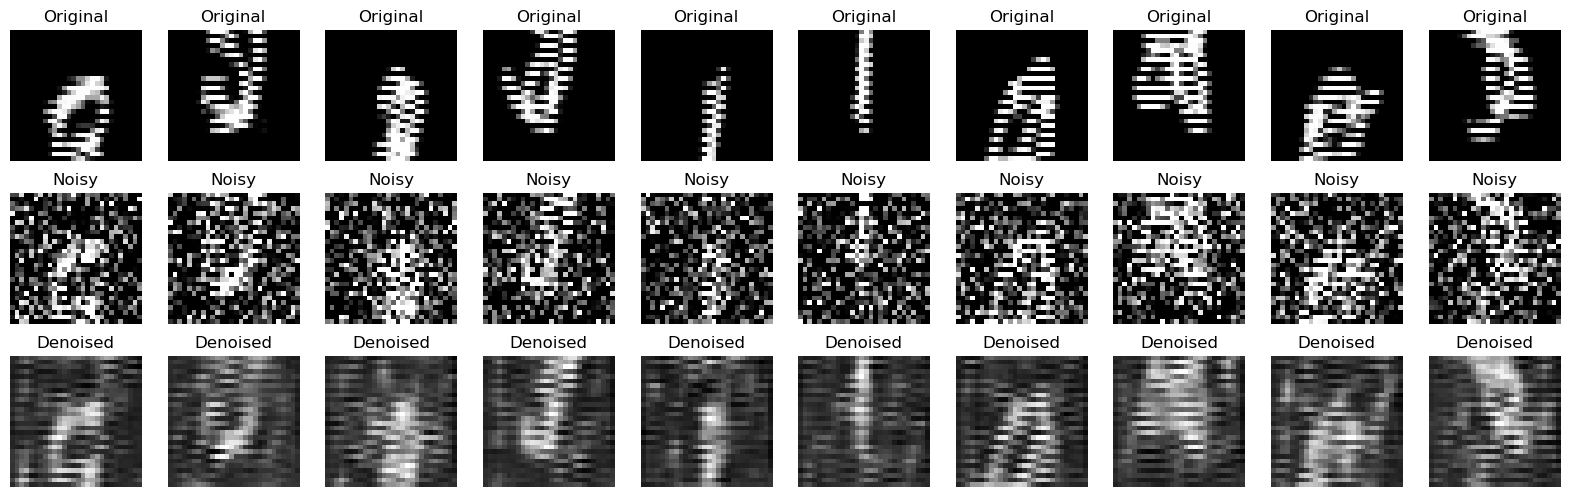

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load the MNIST compressed dataset
data = np.load(r"C:\Users\Laptop\Desktop\CV\Pothole detection\Image classification\mnist_compressed.npz") 
X_test = data['test_images']

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Add noise to the data
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

# Reshape the data for the model
X_train_noisy = X_train_noisy.reshape((-1, 28, 28, 1))
X_test_noisy = X_test_noisy.reshape((-1, 28, 28, 1))
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))


def build_autoencoder():
    model = keras.Sequential()

    # Encoder
    model.add(layers.Input(shape=(28, 28, 1)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    # Decoder
    model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return model

# Compile the autoencoder
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


history = autoencoder.fit(X_train, X_train_noisy, epochs=10, batch_size=128, validation_data=(X_test_noisy, X_test))

# Denoise the test images
denoised_images = autoencoder.predict(X_test_noisy)

# Plot original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

plt.show()


# # Plot training & validation loss
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [ ]:
# Import Libraries
# The required libraries are imported here:
# - numpy: Used for numerical operations and array handling.
# - matplotlib.pyplot: Used for plotting images and graphs.
# - keras and tensorflow.keras.layers: Used to define, compile, and train deep learning models.

# Loading the Dataset
# The MNIST dataset is loaded from a `.npz` file (compressed numpy format). 
# - X_test contains the test images from the dataset.

# Normalization of Data
# The image pixel values are normalized from the range [0, 255] to [0, 1] by dividing by 255.
# This improves convergence during model training by scaling down the input values.

# Adding Noise to Data
# Noise is added to the original dataset to simulate real-world noisy images. 
# - Gaussian noise is generated and added to the original dataset to create noisy images.
# - Noise_factor controls the intensity of the added noise.

# Clipping the Noisy Data
# After adding noise, clipping ensures that pixel values stay within the valid range of [0, 1].

# Reshaping Data
# The dataset is reshaped into 4D arrays with shape (-1, 28, 28, 1), where:
# - -1 allows TensorFlow to automatically calculate the batch size,
# - 28x28 represents the dimensions of the MNIST images,
# - 1 represents the grayscale color channel.

# Building the Autoencoder Model
# The Autoencoder is a type of neural network with two parts:
# - Encoder: Compresses the noisy input images to a lower-dimensional space.
# - Decoder: Reconstructs the clean image from the encoded representation.
#
# Architecture of the Autoencoder:
# - The encoder extracts features using convolutional layers, followed by max-pooling layers that downsample the image.
# - The decoder reconstructs the image using upsampling layers and convolutional layers, with a sigmoid activation in the last layer to squish the output between 0 and 1.

# Compiling the Model
# The model is compiled using:
# - Adam optimizer: Known for its efficiency in training deep learning models.
# - Binary cross-entropy loss: Suitable for pixel-wise binary classification, as the image pixels are in the range [0, 1].

# Training the Model
# The autoencoder is trained using the noisy images as inputs, and the clean images as targets.
# The validation data is the noisy test set, so we can evaluate the model's performance on unseen data.

# Denoising the Test Images
# Once trained, the model is used to predict (denoise) the noisy test images.

# Plotting the Images
# We display the following:
# - Original images: The clean MNIST images.
# - Noisy images: The test images with added noise.
# - Denoised images: The output of the autoencoder after predicting on the noisy images.
# The images are arranged in three rows to visually compare them.



# Theoretical Explanation of Autoencoders
# An autoencoder is a type of neural network used for unsupervised learning, primarily for tasks like data compression, denoising, or dimensionality reduction. Its architecture consists of two main parts:

# Encoder:
# This part of the network compresses the input data (e.g., an image) into a smaller, more abstract representation.
# It uses layers like Convolutional layers or Dense layers to extract important features and reduce the dimensionality of the input.

# Decoder:
# This part reconstructs the input data from the compressed representation created by the encoder.
# It typically uses layers like Upsampling or Transpose Convolution to expand the compressed features back to the original input dimensions.

# In this case, the autoencoder is used for image denoising, where:
# - The noisy input image is processed by the encoder to extract key features while ignoring noise.
# - The decoder reconstructs the clean version of the image, removing the noise.

# How the Denoising Process Works:
# 1. Noisy Image: The input image contains noise.
# 2. Encoder: The encoder compresses the noisy image, capturing important features.
# 3. Decoder: The decoder reconstructs the clean image by learning how to remove the noise.


# Why Autoencoders Work Well for Denoising
# Feature Extraction: The Encoder extracts the most important features from the input data, which helps the model to ignore irrelevant noise and focus on essential patterns.
# Compression and Decompression: By forcing the model to learn a compressed representation of the data, it is encouraged to capture the most important aspects of the input while ignoring unnecessary details (e.g., noise).
# Image Reconstruction: The Decoder reconstructs the image by utilizing the learned features in the latent space. The model has learned to identify which features should be preserved (e.g., edges, shapes) and which can be discarded (e.g., random noise).


# Practical Exam Questions and Answers:

# Q: What is the purpose of adding noise to the MNIST dataset in this code?
# A: The noise is added to simulate real-world imperfections in images, which helps the model learn to denoise and improve its robustness in handling noisy input images.

# Q: Why is the autoencoder using `binary_crossentropy` as the loss function?
# A: `binary_crossentropy` is appropriate because the pixel values of the MNIST dataset (after normalization) lie in the range `[0, 1]`, making it suitable for binary classification tasks like image reconstruction.

# Q: How does the architecture of the autoencoder help in denoising images?
# A: The encoder compresses the noisy image into a lower-dimensional latent space, capturing the key features while discarding noise. The decoder reconstructs the denoised image by learning the mapping from the latent space to the clean image.

# Q: What is the role of the `MaxPooling2D` and `UpSampling2D` layers in the autoencoder?
# A: `MaxPooling2D` reduces the spatial dimensions of the image, helping the network focus on high-level features. `UpSampling2D` restores the image's dimensions, helping the decoder reconstruct the image.
